In [25]:
import json
import numpy as np
import os
os.getcwd()

'/Users/sidhartkrishnan/Documents/Programming/Projects/cs236/carafe/src'

In [26]:
RESULTS_FILE = "../results/final_results/expmt/output_store.json"
DATASET_FILE = "../data/verified_data/dataset-test.json"



with open(DATASET_FILE, "r") as f:
    dataset = json.load(f)


In [57]:
def prediction(x, context='no-context', direct_ans=False):
    if not direct_ans:
        return x[context]['pred']['prediction']
    return make_num(x[context]['metadata']['llm_output'].split("=")[0])

def answer(data):
    return data['answer']

def make_num(y):
    try:
        if type(y) in [int, float, np.float64]:
            return y
        if type(y) == str:
            return np.float64(y.strip('\n').split(" ")[0])
    except:
        return None

def accuracy_metric(y, y_hat):
    y = make_num(y)
    y_hat = make_num(y_hat)

    if y is None or y_hat is None:
        return 0
    if y < 0 or y_hat < 0:
        return 0
    if y == 0 and y_hat == 0:
        return 1
    elif y == 0 or y_hat == 0:
        return max(0, 1-np.abs(np.log10(np.abs(y - y_hat))))
    # elif y/y_hat == 0:
    #     return 0
    try:
        return max(0, 3-np.abs(np.log10(y/y_hat)))/3.0
    except:
        return 0

In [62]:
def evaluate(result_file, pred_extractor):
    with open(result_file, "r") as f:
        results = json.load(f)
    accuracies = []
    for data, result in zip(dataset, results):
        accuracy = accuracy_metric(data['answer'], pred_extractor(result))
        # if data['units'] == 'percents':
        #     accuracy = min(accuracy, accuracy_metric(data['answer']/100, prediction(result, context=context, direct_ans=direct_ans)))
        accuracies.append(accuracy)
    print(f"{np.mean(accuracies)} ")
    return accuracies

def parsable(result_file, parsable_extractor):
    with open(result_file, "r") as f:
        results = json.load(f)
    parsable = [parsable_extractor(result) for result in results]
    print(f"{np.mean(parsable)} ")
    return parsable

# evaluate("../results/final_results/expmt3/output_store.json")
# evaluate("../results/final_results/expmt1/output_store.json")
# evaluate("../results/final_results/expmt0.5/output_store_k=5.json", direct_ans=True)
pass

In [64]:

extractor = lambda ctxt: (lambda x: x[ctxt]["metadata"]["direct_prediction"])
parse_extractor = lambda ctxt: (lambda x: make_num(x[ctxt]["metadata"]["direct_prediction"]) is not)


_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('regular-context'))
_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('distractor-context'))
_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('no-context'))

_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('regular-context'))
_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('distractor-context'))
_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('no-context'))


0.8084834923691006 
0.7341490883243174 
0.3269044846577947 
1.0 
1.0 
0.64 


In [65]:

extractor = lambda ctxt: (lambda x: x[ctxt]["metadata"]["prediction"])
parse_extractor = lambda ctxt: (lambda x: x[ctxt]["parsable"])


_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('regular-context'))
_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('distractor-context'))
_ = evaluate("../results/final_results/expmt0.0/output_store_k=5.json", extractor('no-context'))

_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('regular-context'))
_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('distractor-context'))
_ = parsable("../results/final_results/expmt0.0/output_store_k=5.json", parse_extractor('no-context'))

0.2925498588955243 
0.23674292400050245 
0.13233901236806336 
0.64 
0.62 
0.38 


In [66]:

extractor = lambda ctxt: (lambda x: x[ctxt]["pred"]["prediction"])
parse_extractor = lambda ctxt: (lambda x: x[ctxt]["parsable"])


_ = evaluate("../results/final_results/expmt1/output_store.json", extractor('regular-context'))
_ = evaluate("../results/final_results/expmt1/output_store.json", extractor('distractor-context'))
_ = evaluate("../results/final_results/expmt1/output_store.json", extractor('no-context'))

_ = parsable("../results/final_results/expmt1/output_store.json", parse_extractor('regular-context'))
_ = parsable("../results/final_results/expmt1/output_store.json", parse_extractor('distractor-context'))
_ = parsable("../results/final_results/expmt1/output_store.json", parse_extractor('no-context'))

0.9040622826621211 
0.8742553815000149 
0.4888725993086506 
0.98 
1.0 
0.88 


In [67]:

extractor = lambda ctxt: (lambda x: x[ctxt]["pred"]["prediction"])
parse_extractor = lambda ctxt: (lambda x: x[ctxt]["parsable"])


_ = evaluate("../results/final_results/expmt3.0/output_store.json", extractor('regular-context'))
_ = evaluate("../results/final_results/expmt3.0/output_store.json", extractor('distractor-context'))
_ = evaluate("../results/final_results/expmt3.0/output_store.json", extractor('no-context'))

_ = parsable("../results/final_results/expmt3.0/output_store.json", parse_extractor('regular-context'))
_ = parsable("../results/final_results/expmt3.0/output_store.json", parse_extractor('distractor-context'))
_ = parsable("../results/final_results/expmt3.0/output_store.json", parse_extractor('no-context'))

0.8841458655346982 
0.8263558746237166 
0.5780048019874497 
1.0 
1.0 
0.96 


In [72]:
ks = [2, 5, 10, 20]
parsable_percs = [parsable(f"../results/final_results/expmt0/output_store_k={k}.json", parse_extractor('regular-context')) for k in ks]

0.42 
0.6 
0.74 
0.62 


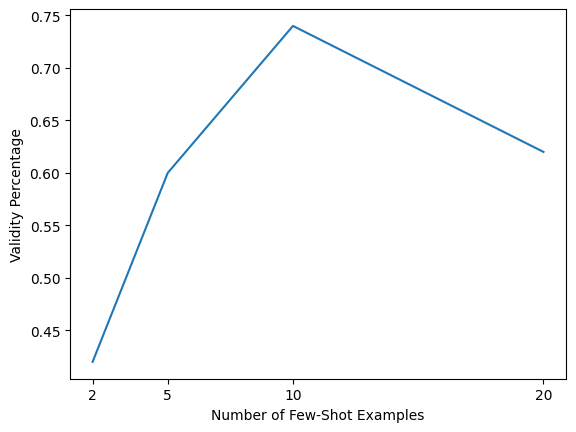

In [78]:
vals = [0.42, 0.6, 0.74, 0.62]
# Plot ks vs vals
import matplotlib.pyplot as plt
plt.plot(ks, vals)
plt.xlabel("Number of Few-Shot Examples")
plt.xticks(ks)
plt.ylabel("Validity Percentage")
# plt.title("Validity Percentage vs Number of Few-Shot Examples")
plt.savefig("../results/final_results/k-shot.png")

In [81]:
x = {                "llm_output": "SUMMARY:= We want to compute the CO2 emissions from the creation of GPT-3, a large deep net. However, we do not have any contextual information to help us answer this question.\n\nPROGRAM:=\n# Q0: What is the CO2 emissions from the creation of GPT-3, the deep net of unprecedented size that can write Javascript and finish your GoT fan fiction?\n# R0: This is the main question we want to answer.\n# Q1: What is the energy consumption of training GPT-3?\n# R1: To compute the CO2 emissions from the creation of GPT-3, we need to know the energy consumption of training GPT-3 because the CO2 emissions are proportional to the energy consumption.\n# F1: We do not have any information about the energy consumption of training GPT-3.\nA1=None # (J)\n# Q2: What is the CO2 emissions per unit energy?\n# R2: To compute the CO2 emissions from the creation of GPT-3, we need to know the CO2 emissions per unit energy because the CO2 emissions are proportional to the energy consumption.\n# F2: We do not have any information about the CO2 emissions per unit energy.\nA2=None # (kg/J)\n# F0: The CO2 emissions from the creation of GPT-3 is the energy consumption of training GPT-3 times the CO2 emissions per unit energy.\nA0=A1*A2 # (kg)",
}
print(x["llm_output"].split("PROGRAM:=")[1])


# Q0: What is the CO2 emissions from the creation of GPT-3, the deep net of unprecedented size that can write Javascript and finish your GoT fan fiction?
# R0: This is the main question we want to answer.
# Q1: What is the energy consumption of training GPT-3?
# R1: To compute the CO2 emissions from the creation of GPT-3, we need to know the energy consumption of training GPT-3 because the CO2 emissions are proportional to the energy consumption.
# F1: We do not have any information about the energy consumption of training GPT-3.
A1=None # (J)
# Q2: What is the CO2 emissions per unit energy?
# R2: To compute the CO2 emissions from the creation of GPT-3, we need to know the CO2 emissions per unit energy because the CO2 emissions are proportional to the energy consumption.
# F2: We do not have any information about the CO2 emissions per unit energy.
A2=None # (kg/J)
# F0: The CO2 emissions from the creation of GPT-3 is the energy consumption of training GPT-3 times the CO2 emissions per